### Analisis Datos Tráfico Barcelona

Importamos librerías

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

### 2018

### Junio

Cargamos datos del csv desde url

In [3]:
url_fichero = 'https://opendata-ajuntament.barcelona.cat/resources/auto/transit/2018_06_Juny_ITINERARIS_ITINERARIS.csv'
dfTraficBarc = pd.read_csv(url_fichero)

Mostramos columnas y valores del dataframe creado

In [4]:
print(dfTraficBarc.columns)
dfTraficBarc.head()
dfTraficBarc

Index(['idTram', 'infoDisponible', 'data', 'tempsActual', 'tempsPrevist',
       'tempsRecorregutFutur', 'factorReferenciaActual', 'tendencia'],
      dtype='object')


,idTram,infoDisponible,data,tempsActual,tempsPrevist,tempsRecorregutFutur,factorReferenciaActual,tendencia
0,1,1,20180601002553,301,300,1,1,1
1,2,1,20180601002553,262,257,1,1,1
2,3,1,20180601002553,306,306,1,1,1
3,4,1,20180601002553,325,324,1,1,1
4,5,1,20180601002553,0,0,-1,-1,-1
...,...,...,...,...,...,...,...,...
123569,78,1,20180630235056,0,0,-1,-1,-1
123570,2001,1,20180630235056,0,0,-1,-1,-1
123571,2002,1,20180630235056,0,0,-1,-1,-1
123572,2003,1,20180630235056,0,0,-1,-1,-1


#### Examinamos los datos

Tipo

In [5]:
print(dfTraficBarc.dtypes)

idTram                    int64
infoDisponible            int64
data                      int64
tempsActual               int64
tempsPrevist              int64
tempsRecorregutFutur      int64
factorReferenciaActual    int64
tendencia                 int64
dtype: object


Cantidad de nulos = 0

In [6]:
dfTraficBarc.isnull().sum()

idTram                    0
infoDisponible            0
data                      0
tempsActual               0
tempsPrevist              0
tempsRecorregutFutur      0
factorReferenciaActual    0
tendencia                 0
dtype: int64

Examinamos los valores de tempsActual

In [7]:
dfTraficBarc['tempsActual'].value_counts()

0       46724
164      2781
260      2113
104      1750
1108     1498
        ...  
656         1
528         1
464         1
1007        1
1919        1
Name: tempsActual, Length: 692, dtype: int64

Eliminamos las filas con tempsActual 0. 
Ya que vamos a obtener la mediana de este campo

In [8]:
dfTraficBarc = dfTraficBarc.drop(dfTraficBarc[dfTraficBarc['tempsActual'] == 0].index)
dfTraficBarc

,idTram,infoDisponible,data,tempsActual,tempsPrevist,tempsRecorregutFutur,factorReferenciaActual,tendencia
0,1,1,20180601002553,301,300,1,1,1
1,2,1,20180601002553,262,257,1,1,1
2,3,1,20180601002553,306,306,1,1,1
3,4,1,20180601002553,325,324,1,1,1
5,6,1,20180601002553,275,275,1,1,1
...,...,...,...,...,...,...,...,...
123563,72,0,20180630235056,179,0,1,-1,-1
123564,73,0,20180630235056,105,0,1,-1,-1
123566,75,0,20180630235056,219,0,1,-1,-1
123567,76,0,20180630235056,86,0,1,-1,-1


Eliminamos las columnas que no son de interes

In [9]:
dfTraficBarc = dfTraficBarc.drop(columns = ['idTram','infoDisponible','tempsPrevist','tempsRecorregutFutur','factorReferenciaActual','tendencia'])
dfTraficBarc

,data,tempsActual
0,20180601002553,301
1,20180601002553,262
2,20180601002553,306
3,20180601002553,325
5,20180601002553,275
...,...,...
123563,20180630235056,179
123564,20180630235056,105
123566,20180630235056,219
123567,20180630235056,86


Renombramos columnas de data por fecha

In [10]:
dfTraficBarc = dfTraficBarc.rename(columns = {'data':'fecha'})

#### Formateamos el campo fecha

In [11]:
dfTraficBarc['fecha']

0         20180601002553
1         20180601002553
2         20180601002553
3         20180601002553
5         20180601002553
               ...      
123563    20180630235056
123564    20180630235056
123566    20180630235056
123567    20180630235056
123568    20180630235056
Name: fecha, Length: 76850, dtype: int64

In [12]:
dfTraficBarc['fecha'] = pd.to_datetime(dfTraficBarc['fecha'], format='%Y%m%d%H%M%S')
dfTraficBarc['fecha']

0        2018-06-01 00:25:53
1        2018-06-01 00:25:53
2        2018-06-01 00:25:53
3        2018-06-01 00:25:53
5        2018-06-01 00:25:53
                 ...        
123563   2018-06-30 23:50:56
123564   2018-06-30 23:50:56
123566   2018-06-30 23:50:56
123567   2018-06-30 23:50:56
123568   2018-06-30 23:50:56
Name: fecha, Length: 76850, dtype: datetime64[ns]

#### Agrupamos

Añadimos campo fecha como indice

In [13]:
#dfTraficBarc.index = dfTraficBarc['data']
#dfTraficBarc.head()

In [14]:
dfTraficBarc = dfTraficBarc.set_index('fecha')
dfTraficBarc

,tempsActual
fecha,
2018-06-01 00:25:53,301
2018-06-01 00:25:53,262
2018-06-01 00:25:53,306
2018-06-01 00:25:53,325
2018-06-01 00:25:53,275
...,...
2018-06-30 23:50:56,179
2018-06-30 23:50:56,105
2018-06-30 23:50:56,219


Agrupamos los registros por día y obtenemos la suma del tiempo en segundos por día

In [15]:
dfTraficBarcTempsActual = dfTraficBarc.resample('D').median()
dfTraficBarcTempsActual

,tempsActual
fecha,
2018-06-01,219.0
2018-06-02,206.0
2018-06-03,206.0
2018-06-04,215.0
2018-06-05,209.0
2018-06-06,210.5
2018-06-07,208.0
2018-06-08,207.0
2018-06-09,207.0


In [17]:
len(dfTraficBarcTempsActual)

30

Gráfico de visualización

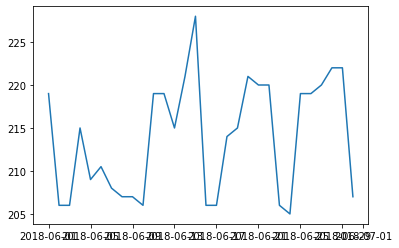

In [16]:
plt.plot(dfTraficBarcTempsActual)
plt.show()